**Temel kütüphanelerin dosyaya dahil edilmesi.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**İki vektör arasındaki mesafeyi euclidean methodu kullanılarak bulan fonksiyon.**

In [3]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return np.sqrt(distance)

**Bir test vektörünün "fotoğraf" sıra ile tüm train vektörleriyle "fotoğraf" aralarındaki mesafenin ölçülmesi ardından bu mesafelerin en küçük k tanesinin bir listeye eklenmesi. Burada k tanesi bir liste olarak fonksiyona verilebilir bu sayede farklı k değerleri için sonuçlar bulunabilir.**

In [4]:
def find_neighbors(train, test_row, num_neighbors):

    distances = []

    for train_row in train:
        dist = euclidean_distance(train_row, test_row)
        distances.append((dist,train_row[-1]))

    distances.sort(key=lambda tup: tup[0])

    neighbors_list = []
    for j in num_neighbors:
        neighbors = []
        for i in range(j):
            neighbors.append(distances[i][1])
        neighbors_list.append(neighbors)

    return neighbors_list

**Bir vektöre "fotoğrafa" en yakın vektörlerin "fotoğrafların" sayısının hesaplanması buna göre vektörün hangi sınıfa ait olduğunun belirlenmesi, burada yine farklı k değerleri için değişen en yakın vektör sayısına göre değişen sonuçlar toplu olarak hesaplanabilir.**

In [5]:
def find_class(train, test_row, num_neighbors):

    neighbors_list = find_neighbors(train, test_row, num_neighbors)

    predictions = []
    for i in range(len(neighbors_list)):
        my_list2 = np.array(neighbors_list[i])
        ones = np.sum(my_list2)

        if ones > int((len(neighbors_list[i]) - 1)  / 2):
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

**Verilerin projeye dahil edilmesi.**

In [7]:
data = np.load("data2.npy")

**Verilerin rastgele bir şekilde karıştırılması ardından, test ve train olarak ayrılması. Burada oran 90-10 olarak belirlenmiştir.**

In [9]:
np.random.shuffle(data)

slicer = int(data.shape[0]*0.9)
data_train = data[:slicer,:]
data_test = data[slicer:data.shape[0],:]

**Burada tüm test verileri sırasıyla değerlendirildi ve tahmin edilen sonuçlar alındı.**

In [10]:
predicted_values = []
my_list = range(1,60,2)
for test_row in data_test:
    predictions = find_class(data_train, test_row, my_list)
    predicted_values.append(predictions)

**Burada tahmin edilen değerler farklı k değerlerine göre tek tek doğru değerler ile karşılaştırıldı ve doğruluk değeri hesaplandı.**

In [11]:
k = []
for i in range(len(predicted_values[0])):

    true_prediction = 0
    for j in range(len(data_test)):
        if data_test[j,-1] == predicted_values[j][i]:
            true_prediction += 1
        else:
            continue

    k.append(true_prediction/(len(data_test)+1))

**Farklı k değerlerine göre elde edilen doğruluk değerlerinin bir grafik olarak çizdirilmesi.**

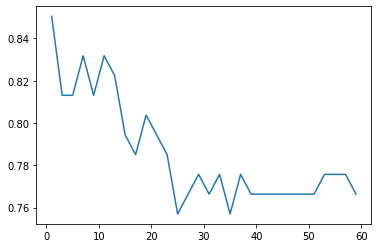

In [12]:
plt.plot(my_list,k)
plt.show()

**Verilerin her seferinde rastgele karıştırılması sonucu, programın her çalıştırılmasında farklı doğruluk değerleri elde ettim. Fakat her seferinde doğruluk değerleri farklı k değerleri için 70-85 arasında çıktı. Buradan sonuç olarak modelin doğru k değeri seçilerek %85 doğruluk oranı ile çalıştığı söylenebilir.**